In [90]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# first need to load both the denoised results and the original data.  the denoised file is just a numpy array so that's easy
denoised_data = np.load("UDVD-MF-Denoising/examples/PtCeO2_030303_udvd_mf.npy")

# but the tiff file has multiple frames stacked together, so we need to loop through them to get each one separately. PIL doesn't load them all at once
img = Image.open("UDVD-MF-Denoising/examples/PtCeO2_030303.tif")
original_data = []
for i in range(img.n_frames):
    img.seek(i)  # move to frame i
    original_data.append(np.array(img))  # convert to numpy and save
original_data = np.array(original_data)  # stack into 3d array
# quick check to make sure everything loaded properly
print(f"denoised shape: {denoised_data.shape}")
print(f"original shape: {original_data.shape}")
print(f"denoised range: [{denoised_data.min():.4f}, {denoised_data.max():.4f}]")
print(f"original range: [{original_data.min():.4f}, {original_data.max():.4f}]")

denoised shape: (1410, 1024, 1024)
original shape: (1410, 1024, 1024)
denoised range: [1.5846, 12.8333]
original range: [0.0000, 227.0000]


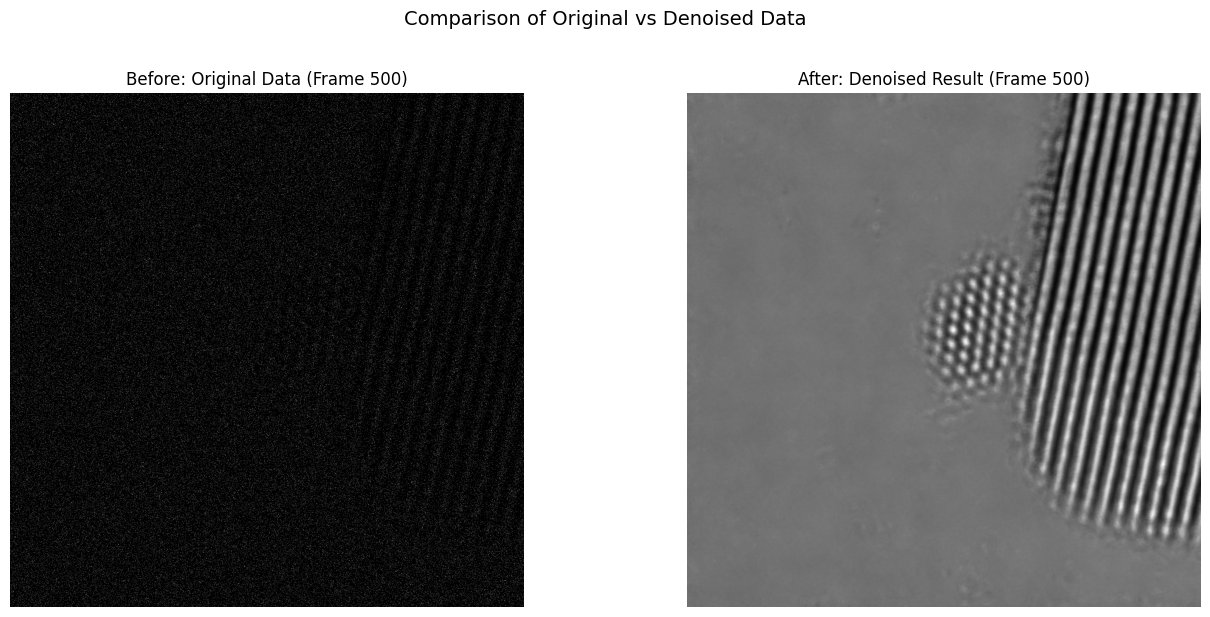

In [91]:
# looking at one frame side by side, frame 500 is somewhere in the middle so should be representative
frame = 500

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(original_data[frame], cmap='gray')
axes[0].set_title(f'Before: Original Data (Frame {frame})')
axes[0].axis('off')
axes[1].imshow(denoised_data[frame], cmap='gray')
axes[1].set_title(f'After: Denoised Result (Frame {frame})')
axes[1].axis('off')
plt.suptitle('Comparison of Original vs Denoised Data', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

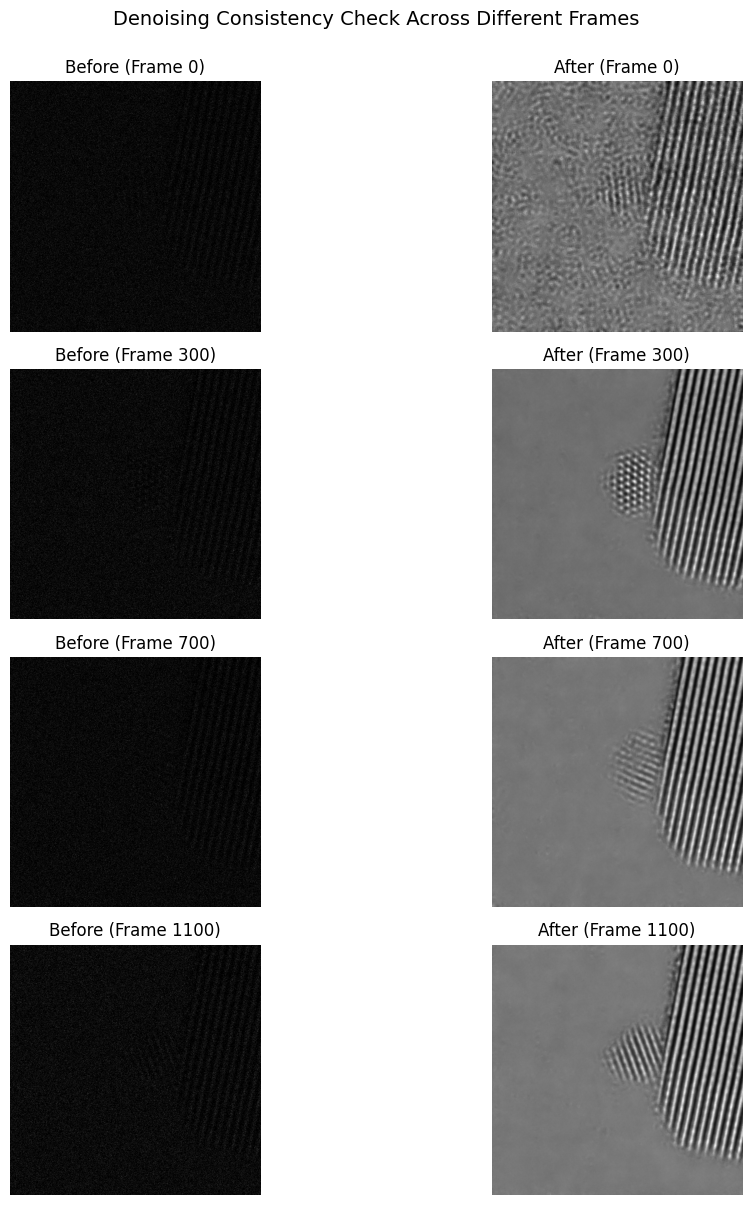

In [92]:
# now check a few different frames to see if denoising is consistent, picked frames from beginning, middle, and end of the dataset
frames_to_check = [0, 300, 700, 1100]
fig, axes = plt.subplots(len(frames_to_check), 2, figsize=(12, len(frames_to_check)*3))

for i, frame in enumerate(frames_to_check):
    # left column is original
    axes[i, 0].imshow(original_data[frame], cmap='gray')
    axes[i, 0].set_title(f'Before (Frame {frame})')
    axes[i, 0].axis('off')
    # right column is denoised
    axes[i, 1].imshow(denoised_data[frame], cmap='gray')
    axes[i, 1].set_title(f'After (Frame {frame})')
    axes[i, 1].axis('off')

plt.suptitle('Denoising Consistency Check Across Different Frames', fontsize=14, y=1.0)
plt.tight_layout()
plt.show()

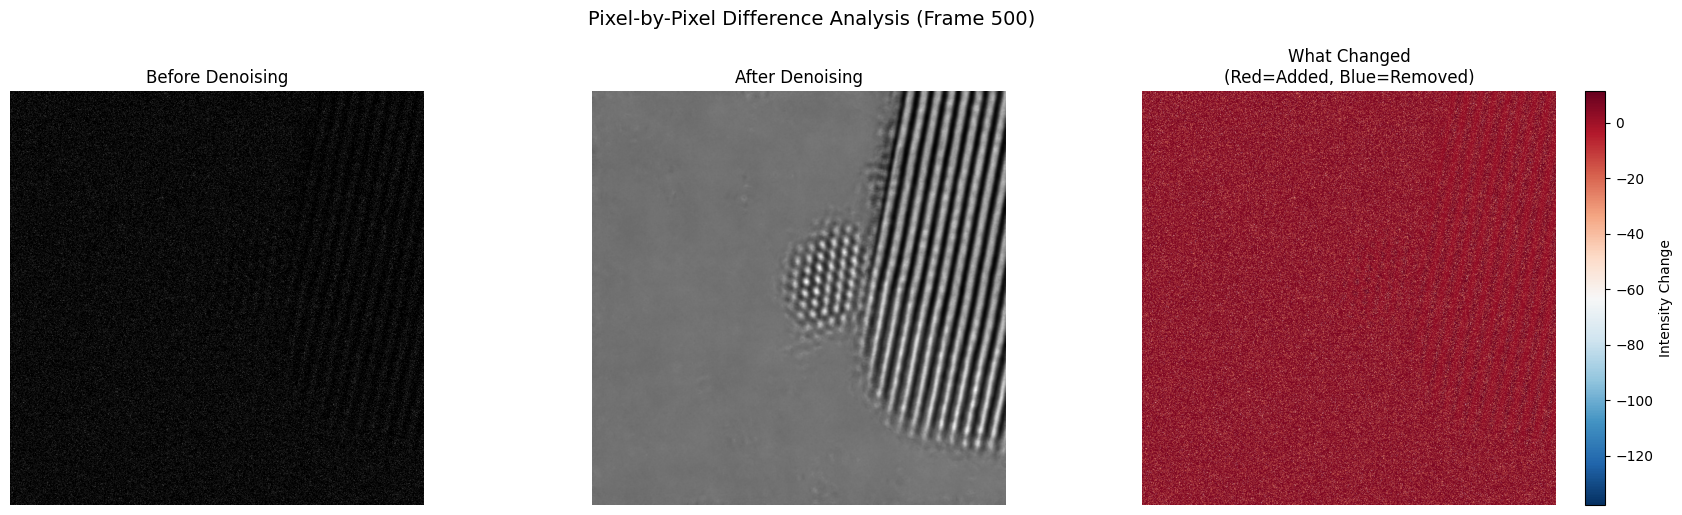

In [93]:
# difference map shows what actually changed. red areas = increased intensity, blue = decreased. basically shows where the noise got removed
frame = 500
diff = denoised_data[frame] - original_data[frame]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].imshow(original_data[frame], cmap='gray')
axes[0].set_title('Before Denoising')
axes[0].axis('off')
axes[1].imshow(denoised_data[frame], cmap='gray')
axes[1].set_title('After Denoising')
axes[1].axis('off')
# using RdBu_r colormap so red=positive diff, blue=negative diff
im = axes[2].imshow(diff, cmap='RdBu_r')
axes[2].set_title('What Changed\n(Red=Added, Blue=Removed)')
axes[2].axis('off')
plt.colorbar(im, ax=axes[2], label='Intensity Change')
plt.suptitle(f'Pixel-by-Pixel Difference Analysis (Frame {frame})', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

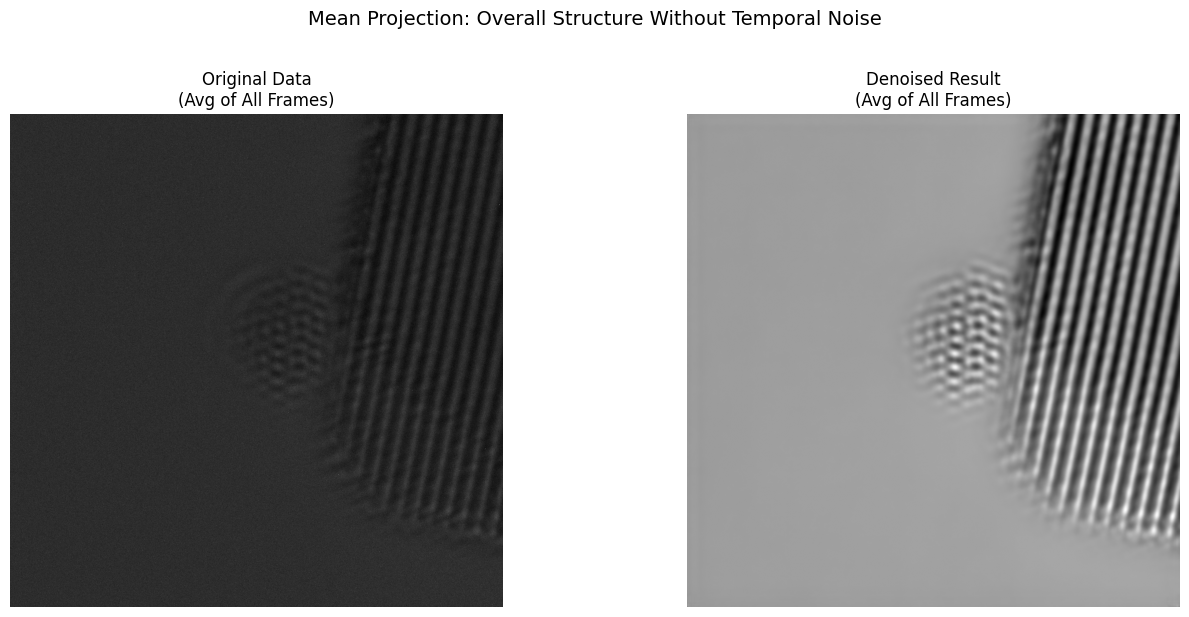

In [94]:
# mean projection = average all frames together into one image to see overall structure without the noise flickering
orig_mean = original_data.mean(axis=0)  # axis=0 means average over frames
denoised_mean = denoised_data.mean(axis=0)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(orig_mean, cmap='gray')
axes[0].set_title('Original Data\n(Avg of All Frames)')
axes[0].axis('off')
axes[1].imshow(denoised_mean, cmap='gray')
axes[1].set_title('Denoised Result\n(Avg of All Frames)')
axes[1].axis('off')
plt.suptitle('Mean Projection: Overall Structure Without Temporal Noise', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

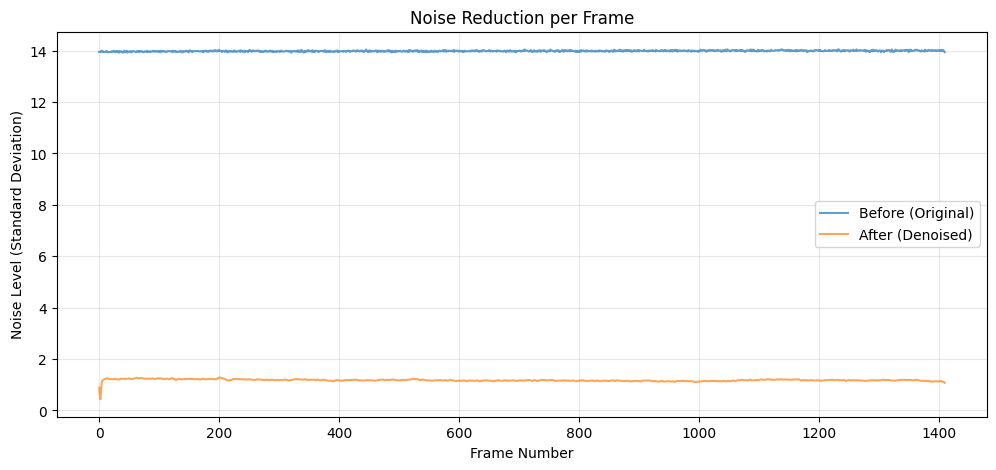

In [95]:
# plot showing noise level over time. noise = standard deviation (std) of pixel values.
# std measures how spread out the pixels are, so higher std = more noise.
# basically the denoising should reduce the std in each frame
orig_stds = original_data.std(axis=(1, 2))  # calculate std for each frame
denoised_stds = denoised_data.std(axis=(1, 2))

plt.figure(figsize=(12, 5))
plt.plot(orig_stds, label='Before (Original)', alpha=0.7, linewidth=1.5)
plt.plot(denoised_stds, label='After (Denoised)', alpha=0.7, linewidth=1.5)
plt.xlabel('Frame Number')
plt.ylabel('Noise Level (Standard Deviation)')
plt.title('Noise Reduction per Frame')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

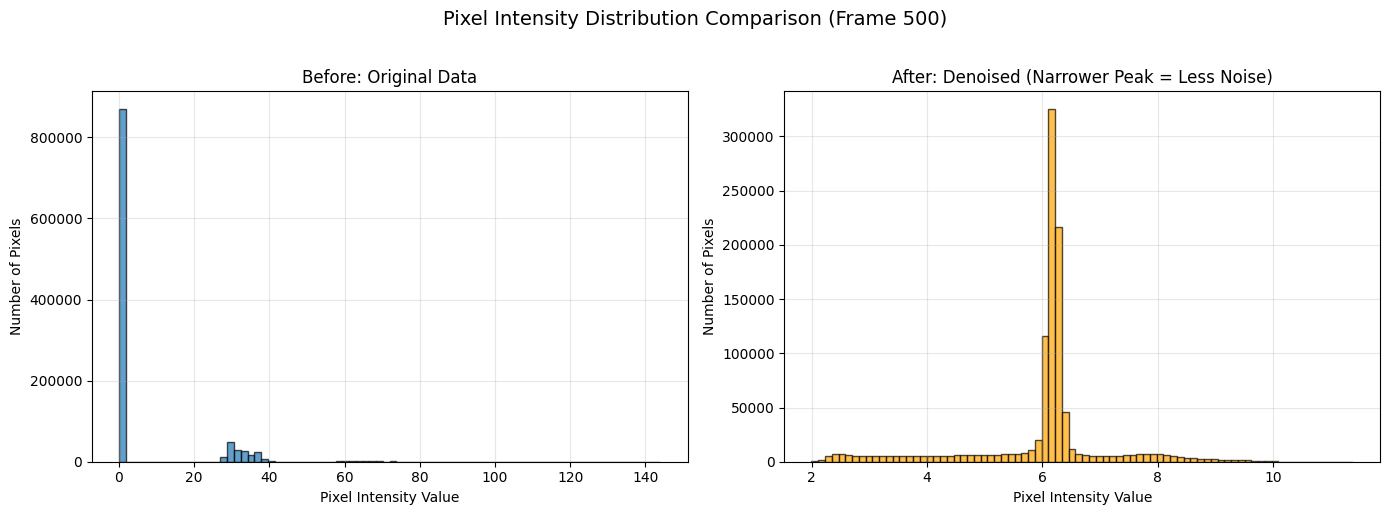

In [96]:
# histograms show the distribution of pixel intensity values, if denoising worked well, the denoised histogram should be  more concentrated (narrower peak) since noise adds random variation
frame = 500
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# flatten() converts 2d image to 1d array for histogram
axes[0].hist(original_data[frame].flatten(), bins=80, alpha=0.7, edgecolor='black')
axes[0].set_title('Before: Original Data')
axes[0].set_xlabel('Pixel Intensity Value')
axes[0].set_ylabel('Number of Pixels')
axes[0].grid(alpha=0.3)
axes[1].hist(denoised_data[frame].flatten(), bins=80, alpha=0.7, edgecolor='black', color='orange')
axes[1].set_title('After: Denoised (Narrower Peak = Less Noise)')
axes[1].set_xlabel('Pixel Intensity Value')
axes[1].set_ylabel('Number of Pixels')
axes[1].grid(alpha=0.3)
plt.suptitle(f'Pixel Intensity Distribution Comparison (Frame {frame})', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

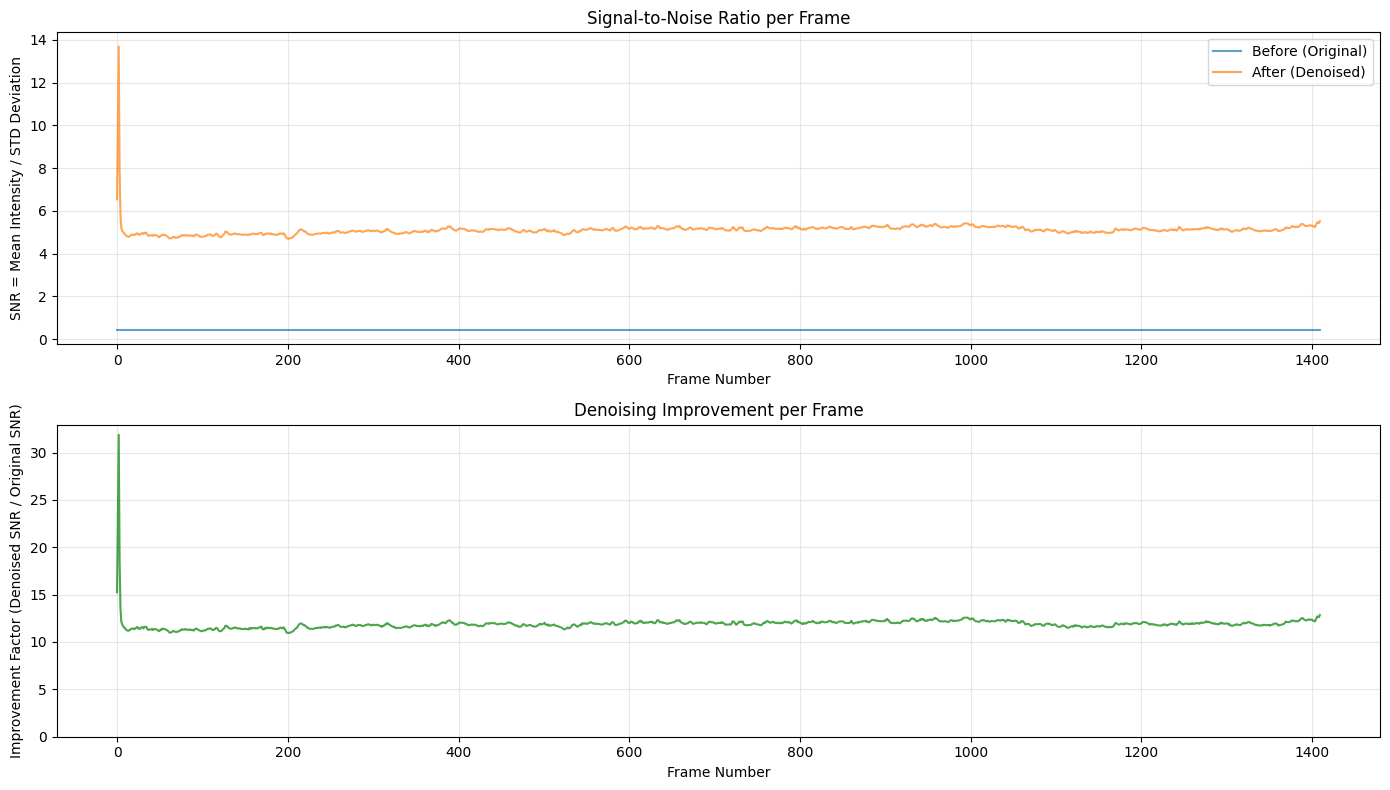

median snr improvement: 11.90x
mean snr improvement: 11.89x


In [97]:
# signal to noise ratio (snr) measures image quality. snr = mean pixel intensity / standard deviation of pixels, basically: signal = mean, noise = std, so snr = mean/std. higher snr = better quality (stronger signal relative to noise)
orig_snr = original_data.mean(axis=(1,2)) / original_data.std(axis=(1,2))
denoised_snr = denoised_data.mean(axis=(1,2)) / denoised_data.std(axis=(1,2))
snr_improvement = denoised_snr / orig_snr  # ratio tells us improvement factor
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# top plot: absolute snr values
axes[0].plot(orig_snr, label='Before (Original)', alpha=0.7, linewidth=1.5)
axes[0].plot(denoised_snr, label='After (Denoised)', alpha=0.7, linewidth=1.5)
axes[0].set_xlabel('Frame Number')
axes[0].set_ylabel('SNR = Mean Intensity / STD Deviation')
axes[0].set_title('Signal-to-Noise Ratio per Frame')
axes[0].legend()
axes[0].grid(alpha=0.3)
# bottom plot: improvement factor
# values above 1 mean denoised is better
axes[1].plot(snr_improvement, color='green', alpha=0.7, linewidth=1.5)
axes[1].set_xlabel('Frame Number')
axes[1].set_ylabel('Improvement Factor (Denoised SNR / Original SNR)')
axes[1].set_title('Denoising Improvement per Frame')
axes[1].set_ylim(bottom=0)  # make sure 0 is visible on y axis
axes[1].grid(alpha=0.3)
plt.tight_layout()
plt.show()


# overall stats
print(f"median snr improvement: {np.median(snr_improvement):.2f}x")
print(f"mean snr improvement: {snr_improvement.mean():.2f}x")

In [98]:
# quantitative summary of how well the denoising worked
print("=== denoising results summary ===\n")

# check a few different frames
print("spot checks at different frames:")
for frame in [0, 500, 1000, 1409]:
    # calculate basic stats for this frame
    orig_mean = original_data[frame].mean()
    denoised_mean = denoised_data[frame].mean()
    orig_std = original_data[frame].std()
    denoised_std = denoised_data[frame].std()
    
    # snr = signal to noise ratio
    snr_orig = orig_mean / orig_std
    snr_denoised = denoised_mean / denoised_std
    print(f"\nframe {frame}:")
    print(f"  original snr: {snr_orig:.2f}")
    print(f"  denoised snr: {snr_denoised:.2f}")
    print(f"  improvement: {snr_denoised/snr_orig:.2f}x")
    print(f"  noise reduction: {(1 - denoised_std/orig_std)*100:.1f}%")

# overall stats for entire dataset
print("\n\noverall (all frames):")
print(f"  original mean: {original_data.mean():.4f}")
print(f"  denoised mean: {denoised_data.mean():.4f}")
print(f"  original std: {original_data.std():.4f}")
print(f"  denoised std: {denoised_data.std():.4f}")
print(f"  average noise reduction: {(1 - denoised_data.std()/original_data.std())*100:.1f}%")

=== denoising results summary ===

spot checks at different frames:

frame 0:
  original snr: 0.43
  denoised snr: 6.54
  improvement: 15.24x
  noise reduction: 93.6%

frame 500:
  original snr: 0.43
  denoised snr: 5.15
  improvement: 11.94x
  noise reduction: 91.7%

frame 1000:
  original snr: 0.43
  denoised snr: 5.34
  improvement: 12.40x
  noise reduction: 91.9%

frame 1409:
  original snr: 0.43
  denoised snr: 5.52
  improvement: 12.85x
  noise reduction: 92.3%


overall (all frames):
  original mean: 6.0119
  denoised mean: 6.0133
  original std: 13.9855
  denoised std: 1.1796
  average noise reduction: 91.6%
